<a href="https://colab.research.google.com/github/smandhada16/logistic_regression/blob/main/Logistic_Regression_for_Binary_and_One_vs_all_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Reference:
# https://towardsdatascience.com/using-logistic-regression-to-create-a-binary-and-multiclass-classifier-from-basics-26f5e1e92777
# Import packages
%matplotlib inline
# import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
def sigmoid(x):
    """Returns value of the sigmoid function."""
    return 1/(1 + np.exp(-x))

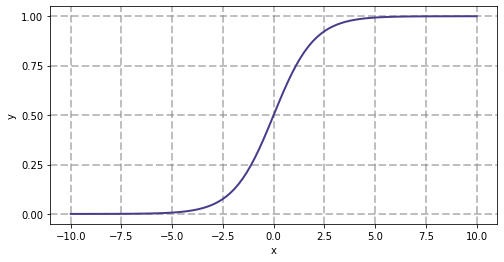

In [ ]:
# Calculate sigmoid
x = np.linspace(-10, 10, 100)
y = sigmoid(x)

# Create figure
fig = plt.figure(figsize=(8, 4))
ax = fig.add_subplot(111)

# Plot sigmoid
ax.plot(x, y, linewidth=2, color='#483d8b')

# Add grid
ax.grid(linestyle='--', linewidth=2, color='gray', alpha=0.5)

# Edit y-ticks
ax.set_yticks([0, 0.25, 0.5, 0.75, 1.0])

# Edit axis labels
ax.set(xlabel='x', ylabel='y')

plt.show()

In [ ]:
# For reproducibility - will seed psuedorandom numbers at same point
np.random.seed(74837)

# Random user and critic scores
user_score = 5*np.random.random(size=100)
critic_score = 5*np.random.random(size=100)

In [ ]:
y = np.zeros(len(user_score))
boundary = lambda x1, x2: 6 - x1 - 2*x2
# Set y = 1 above decision boundary
for i in range(len(y)):
    if boundary(user_score[i], critic_score[i]) + 0.5*np.random.normal() <= 0:
        y[i] = 1
    else:
        y[i] = 0

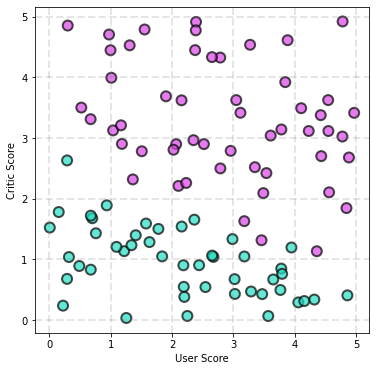

In [ ]:
# Create figure
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111)

# Colors for scatter points
colors = ['#22DDC2', '#DB45E7']
colors_data = [colors[int(i)] for i in y]

# Plot sample data
ax.scatter(user_score, critic_score, color=colors_data, s=100, edgecolor='black', linewidth=2, alpha=0.7)

# Add grid
ax.grid(linestyle='--', linewidth=2, color='gray', alpha=0.2)

# Add axis labels
ax.set(xlabel='User Score', ylabel='Critic Score')

plt.show()

In [ ]:
X = np.concatenate((np.ones(shape=(len(user_score), 1)), 
                    user_score.reshape(len(user_score), 1), 
                    critic_score.reshape(len(critic_score), 1)), 
                    axis=1)
y = y.reshape(len(y), 1)
w = np.zeros(shape=(3, 1))

In [ ]:
def cost_function(X, y, w):
    """
    Returns cost function and gradient
    Parameters
        X: m x 3 matrix of features
        y: m x 1 vector of labels
        w: 3 x 1 vector of weights
    Returns
        cost: value of cost function
        grad: 3 x 1 vector of weight gradients
    """
    
    m = len(y)
    h = sigmoid(np.dot(X, w))
    cost = (1/m)*(-np.dot(y.T, np.log(h)) - np.dot((1 - y).T, np.log(1 - h)))
    grad = (1/m)*np.dot(X.T, h - y)
    return cost, grad

In [ ]:
def gradient_descent(X, y, w, alpha, num_iters):
    """
    Uses gradient descent to minimize cost function.
    
    Parameters
        X: m x 3 matrix of features
        y: m x 1 vector of labels
        w: 3 x 1 vector of weights
        alpha (float): learning rate
        num_iters (int): number of iterations
    Returns
        J: 1 x num_iters vector of costs
        w_new: 3 x 1 vector of optimized weights
    """

    w_new = np.copy(w)
    m = len(y)
    J = np.zeros(num_iters)

    for i in range(num_iters):
        cost, grad = cost_function(X, y, w_new)
        w_new = w_new - alpha*grad
        J[i] = cost
    return J, w_new

In [ ]:
J, w_train = gradient_descent(X, y, w, 0.5, 2000)

In [ ]:
# Create figure
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111)

# Colors for scatter points
colors = ['#22DDC2', '#DB45E7']
colors_data = [colors[int(i)] for i in y]

# Plot decision boundary
x1_bound, x2_bound = np.meshgrid(np.linspace(0, 5, 50), np.linspace(0, 5, 50))
prob = sigmoid(w_train[0] + x1_bound*w_train[1] + x2_bound*w_train[2])
ax.contour(x1_bound, x2_bound, prob, levels=[0.5], colors='black')

# Plot sample data
ax.scatter(user_score, critic_score, color=colors_data, s=100, edgecolor='black', linewidth=2, alpha=0.7)

# Add grid
ax.grid(linestyle='--', linewidth=2, color='gray', alpha=0.2)

# Add axis labels
ax.set(xlabel='x', ylabel='y')

plt.show()

NameError: ignored

In [ ]:
def predict(X, w):
    """
    Predicts classifiers based on weights
    Parameters
        X: m x 3 matrix of features
        w: 3 x 1 vector of weights
    
    Returns
        predictions: m x 1 vector of predictions
    """

    predictions = sigmoid(np.dot(X, w))

    for i, val in enumerate(predictions):
        if val >= 0.5:
            predictions[i] = 1
        else:
            predictions[i] = 0
    return predictions

In [ ]:
X_new = np.asarray([[1, 3.4, 4.1], [1, 2.5, 1.7], [1, 4.8, 2.3]])
print(predict(X_new, w_train))

[[1.]
 [0.]
 [1.]]


## Multiclass classification (one-vs.-all classification)

In [ ]:
np.random.seed(7839374)

# Random user and critic scores
user_score = 5*np.random.random(size=100)
critic_score = 5*np.random.random(size=100)

y = np.zeros(len(user_score))
boundary_1 = lambda x1, x2: 6 - x1 - 2*x2
boundary_2 = lambda x1, x2: 4 + x1 - 2*x2

for i in range(len(y)):
    if (boundary_1(user_score[i], critic_score[i]) + 0.7*np.random.normal() <= 0):
        if (boundary_2(user_score[i], critic_score[i]) <= 0):
            y[i] = 2
        else:
            y[i] = 1
    else:
        y[i] = 0

In [ ]:
def relabel_data(y, label):
    """
    Relabels data for one-vs-all classifier
    Parameters
        y: m x 1 vector of labels
        label: which label to set to 1 (sets others to 0)
    
    Returns
        relabeled_data: m x 1 vector of relabeled data
    """

    relabeled_data = np.zeros(len(y))
    for i, val in enumerate(y):
        if val == label:
            relabeled_data[i] = 1
    return relabeled_data.reshape(len(y), 1)

In [ ]:
# Initialize variables
X = np.concatenate((np.ones(shape=(len(user_score), 1)), 
                    user_score.reshape(len(user_score), 1), 
                    critic_score.reshape(len(critic_score), 1)), 
                    axis=1)
y = y.reshape(len(y), 1)
w = np.zeros(shape=(3, 1))

# Train models
y_class1 = relabel_data(y, 0)
_, w_class1 = gradient_descent(X, y_class1, w, 0.5, 2000)

y_class2 = relabel_data(y, 1)
_, w_class2 = gradient_descent(X, y_class2, w, 0.5, 2000)

y_class3 = relabel_data(y, 2)
_, w_class3 = gradient_descent(X, y_class3, w, 0.5, 2000)

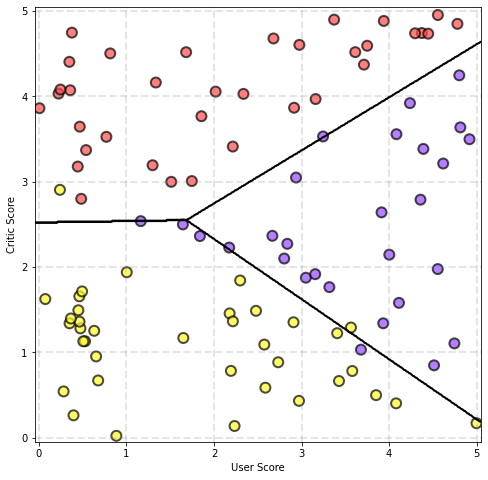

In [ ]:
# Create figure
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)

# Colors for scatter points
colors = ['#FFFA28', '#944AFF', '#FF4A4A']
colors_data = [colors[int(i)] for i in y]

# Plot decision boundaries
x1_bound, x2_bound = np.meshgrid(np.linspace(-0.05, 5.05, 500), np.linspace(-0.05, 5.05, 500))
prob_0 = sigmoid(w_class1[0] + x1_bound*w_class1[1] + x2_bound*w_class1[2])
prob_1 = sigmoid(w_class2[0] + x1_bound*w_class2[1] + x2_bound*w_class2[2])
prob_2 = sigmoid(w_class3[0] + x1_bound*w_class3[1] + x2_bound*w_class3[2])
prob_max = np.zeros(shape=x1_bound.shape)
for i in range(prob_max.shape[0]):
    for j in range(prob_max.shape[1]):
        maximum = max(prob_0[i][j], prob_1[i][j], prob_2[i][j])
        if maximum == prob_0[i][j]:
            prob_max[i][j] = 0
        elif maximum == prob_1[i][j]:
            prob_max[i][j] = 1
        else:
            prob_max[i][j] = 2

ax.contour(x1_bound, x2_bound, prob_max, levels=[0.5, 1.5], colors='black', linewidths=2)

# Plot sample data
ax.scatter(user_score, critic_score, color=colors_data, s=100, edgecolor='black', linewidth=2, alpha=0.7)

# Add grid
ax.grid(linestyle='--', linewidth=2, color='gray', alpha=0.2)

# Add axis labels
ax.set(xlim=(-0.05, 5.05), ylim=(-0.05, 5.05), xlabel='User Score', ylabel='Critic Score')

plt.show()

In [ ]:

def predict_multi(X, w):
    """
    Predicts classifiers based on weights
    Parameters
        X: m x n matrix of features
        w: array of n x 1 vectors of weights
    
    Returns
        predictions: m x 1 vector of predictions
    """

    predictions = np.empty((X.shape[0], 0))

    # Gather predictions for each classifier
    for i in range(len(w)):
        predictions = np.append(predictions, sigmoid(np.dot(X, w[i])), axis=1)
    return np.argmax(predictions, axis=1).reshape(X.shape[0], 1)

In [ ]:
X_new = np.array([[1, 1, 1], [1, 1, 4.2], [1, 4.5, 2.5]])
print(predict_multi(X_new, [w_class1, w_class2, w_class3]))

[[0]
 [2]
 [1]]
